### TU257-Lab6-Demo-2-Roc

In this demo notebook we will look at the ROC charts.

ROC curve, which stands for “receiver operating characteristic” curve. This is a plot that displays the sensitivity and specificity.

Sensitivity: The probability that the model predicts a positive outcome for an observation when indeed the outcome is positive. This is also called the “true positive rate.”

Specificity: The probability that the model predicts a negative outcome for an observation when indeed the outcome is negative. This is also called the “true negative rate.”


In [6]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


In [7]:
import pandas as pd

#Load in the dataset
colnames=['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Edu_Num', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Sex', 'CapitalGain', 'CapitalLoss', 'HrPerWk', 'Native', 'Target'] 
df = pd.read_csv('adult.csv', names=colnames, header=None)
df.head(10)

,Age,WorkClass,Fnlwgt,Education,Edu_Num,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HrPerWk,Native,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
df.isnull().values.any()

False

In [9]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())


Rows     :  32561
Columns  :  15

Features : 
 ['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Edu_Num', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Sex', 'CapitalGain', 'CapitalLoss', 'HrPerWk', 'Native', 'Target']

Missing values :   0

Unique values :  
 Age                 73
WorkClass            9
Fnlwgt           21648
Education           16
Edu_Num             16
MaritalStatus        7
Occupation          15
Relationship         6
Race                 5
Sex                  2
CapitalGain        119
CapitalLoss         92
HrPerWk             94
Native              42
Target               2
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            32561 non-null  int64 
 1   WorkClass      32561 non-null  object
 2   Fnlwgt         32561 non-null  int64 
 3   Education      32561 non-null  object
 4   Edu_Num        32561 non-null  int64 
 5   MaritalStatus  32561 non-null  object
 6   Occupation     32561 non-null  object
 7   Relationship   32561 non-null  object
 8   Race           32561 non-null  object
 9   Sex            32561 non-null  object
 10  CapitalGain    32561 non-null  int64 
 11  CapitalLoss    32561 non-null  int64 
 12  HrPerWk        32561 non-null  int64 
 13  Native         32561 non-null  object
 14  Target         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
# Numerical feature of summary/description 
df.describe()

,Age,Fnlwgt,Edu_Num,CapitalGain,CapitalLoss,HrPerWk
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:

# checking "?" values, how many are there in the whole dataset
df_missing = (df=='?').sum()
df_missing

Age              0
WorkClass        0
Fnlwgt           0
Education        0
Edu_Num          0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HrPerWk          0
Native           0
Target           0
dtype: int64

In [13]:
from sklearn import preprocessing

# encode categorical variables using label Encoder

# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Sex,Native,Target
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [14]:
# apply label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Sex,Native,Target
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


In [15]:
# Next, Concatenate df_categorical dataframe with original df (dataframe)

# first, Drop earlier duplicate columns which had categorical values
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

,Age,Fnlwgt,Edu_Num,CapitalGain,CapitalLoss,HrPerWk,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Sex,Native,Target
0,39,77516,13,2174,0,40,7,9,4,1,1,4,1,39,0
1,50,83311,13,0,0,13,6,9,2,4,0,4,1,39,0
2,38,215646,9,0,0,40,4,11,0,6,1,4,1,39,0
3,53,234721,7,0,0,40,4,1,2,6,0,2,1,39,0
4,28,338409,13,0,0,40,4,9,2,10,5,2,0,5,0


In [16]:
corr_matrix=df.corr()
corr_matrix

,Age,Fnlwgt,Edu_Num,CapitalGain,CapitalLoss,HrPerWk,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Sex,Native,Target
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.003787,-0.010508,-0.266288,-0.020947,-0.263698,0.028718,0.088832,-0.001151,0.234037
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.016656,-0.028145,0.028153,0.001597,0.008931,-0.021291,0.026858,-0.051966,-0.009463
Edu_Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.052085,0.359153,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.050840,0.335154
CapitalGain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.033835,0.030046,-0.043393,0.025505,-0.057919,0.011145,0.048480,-0.001982,0.223329
CapitalLoss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.012216,0.016746,-0.034187,0.017987,-0.061062,0.018899,0.045567,0.000419,0.150526
HrPerWk,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.138962,0.055510,-0.190519,0.080383,-0.248974,0.041910,0.229309,-0.002671,0.229689
WorkClass,0.003787,-0.016656,0.052085,0.033835,0.012216,0.138962,1.000000,0.023513,-0.064731,0.254892,-0.090461,0.049742,0.095981,-0.007690,0.051604
Education,-0.010508,-0.028145,0.359153,0.030046,0.016746,0.055510,0.023513,1.000000,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.064288,0.079317
MaritalStatus,-0.266288,0.028153,-0.069304,-0.043393,-0.034187,-0.190519,-0.064731,-0.038407,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.023819,-0.199307
Occupation,-0.020947,0.001597,0.109697,0.025505,0.017987,0.080383,0.254892,-0.021260,-0.009654,1.000000,-0.075607,0.006763,0.080296,-0.012543,0.075468


<Axes: >

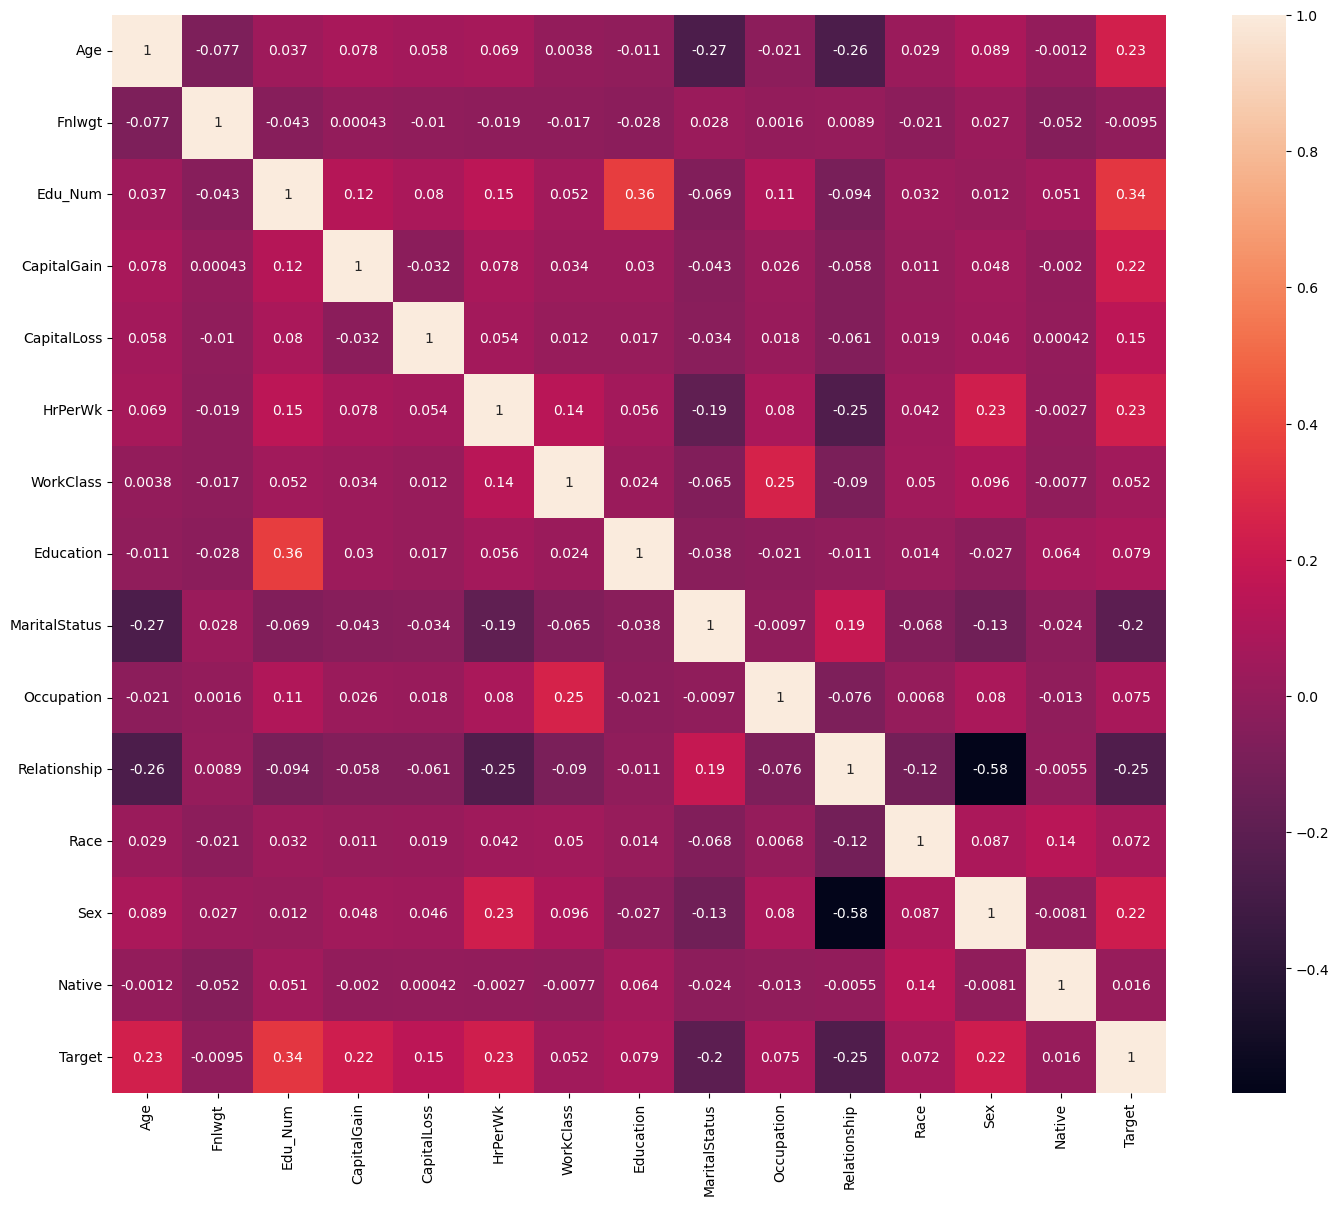

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(17,14))
sn.heatmap(corr_matrix, annot=True)

In [18]:
df['Target'].value_counts()

Target
0    24720
1     7841
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

# Putting independent variables/features to X
X = df.drop('Target',axis=1)

# Putting response/dependent variable/feature to y
y = df['Target']


In [20]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)


In [21]:
################
#  KNN Model
################

In [22]:
# Importing library
from sklearn.neighbors import KNeighborsClassifier

#set k=3
knn_model = KNeighborsClassifier(n_neighbors=3)
#fit the model
knn_model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [23]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
y_pred_default = knn_model.predict(X_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      7436
           1       0.50      0.38      0.43      2333

    accuracy                           0.76      9769
   macro avg       0.66      0.63      0.64      9769
weighted avg       0.74      0.76      0.75      9769



In [24]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6528  908]
 [1437  896]]
0.759954959565974


In [25]:
print(pd.crosstab(pd.Series(y_test), pd.Series(y_pred_default), rownames=['Actual'], colnames=['Predicted'], margins=True))

Predicted     0    1   All
Actual                    
0          1854  402  2256
1           563  147   710
All        2417  549  2966


In [26]:
#Let's print the ROC chart
from sklearn.metrics import roc_curve, auc

# calculate roc curve
Y_predict_prob = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict_prob)
roc_auc = auc(fpr, tpr)
print('AUC = ', roc_auc)
print('tpr = ', tpr)
print('fpt = ', fpr)

AUC =  0.6707665088711282
tpr =  [0.         0.20145735 0.38405486 0.69095585 1.        ]
fpt =  [0.         0.01721356 0.12210866 0.45952125 1.        ]


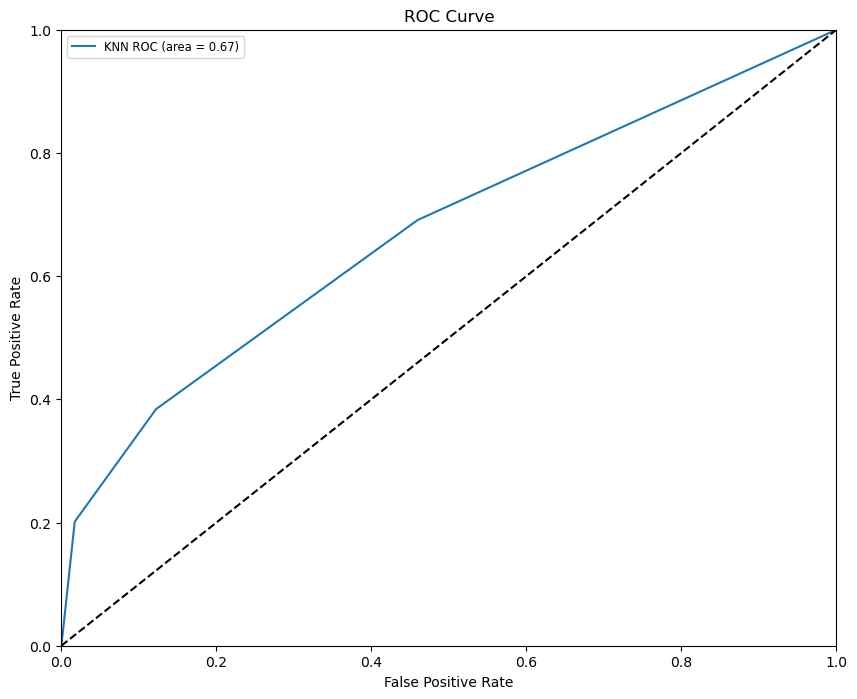

In [ ]:
fig = plt.subplots(figsize=(10,8))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNN', roc_auc)) # false positive and true positive rate

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=0, fontsize='small')
plt.show()

In [28]:
##########################
#  Neural Network Model
##########################

In [29]:
#import SVM model
from sklearn import neural_network as nn

In [30]:
#use MLPClassifier = mult-layer perceptron for Classification - uses Back propagation - default layers = 100
#   max_iters=200
nn_model = nn.MLPClassifier()
#fit the model
nn_model.fit(X_train,y_train)

MLPClassifier()

In [31]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
y_pred_default = nn_model.predict(X_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      7436
           1       0.78      0.19      0.31      2333

    accuracy                           0.79      9769
   macro avg       0.79      0.59      0.59      9769
weighted avg       0.79      0.79      0.74      9769



In [32]:
print(accuracy_score(y_test,y_pred_default))

0.7942471081994062


In [33]:
# calculate roc curve
Y_predict_prob = nn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict_prob)
roc_auc = auc(fpr, tpr)
print('AUC = ', roc_auc)
print('tpr = ', tpr)
print('fpt = ', fpr)

AUC =  0.6276951517933745
tpr =  [0.         0.17016717 0.17016717 ... 0.88684098 0.88684098 1.        ]
fpt =  [0.         0.01331361 0.01344809 ... 0.82813341 0.83001614 1.        ]


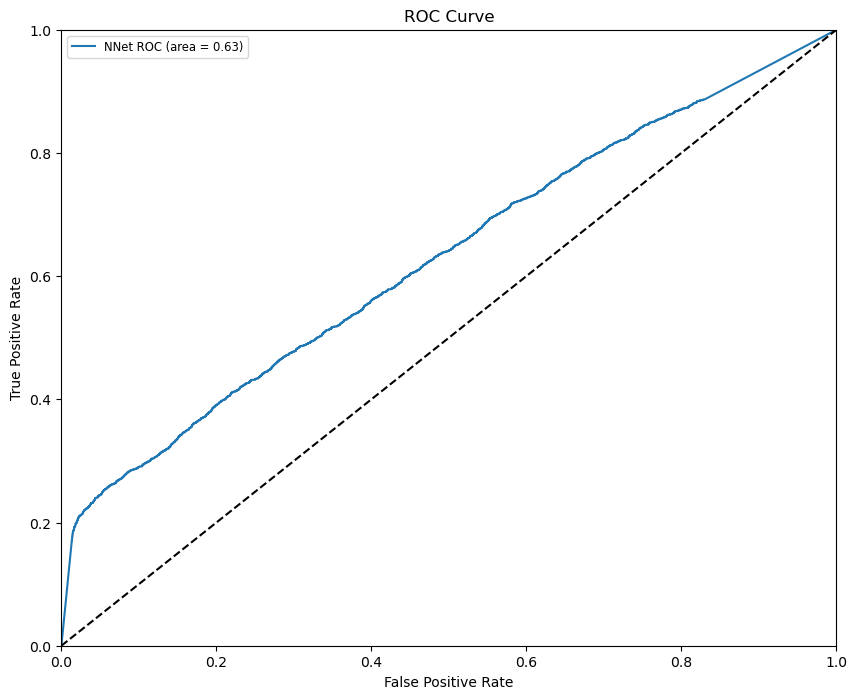

In [34]:
fig = plt.subplots(figsize=(10,8))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('NNet', roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=0, fontsize='small')
plt.show()

In [35]:
#limited functionality for this with SVM 